# Problema de clasificación: Iris Dataset

## Introducción
No todos los metódos de clasificación fueron pensados para soportar la clasificación multiclase, este es el caso de la regresión logística, un método eficaz para la clasificación binaria. Con el fin de ampliar las posibilidades de uso en situaciones con más de una clase, se han desarrollado algunas metodologías que permiten que permiten el uso dentro del territorio de la clasificación multiclase. Esta han sido 3:

- Logistic Regression One vs. All, 
- Logistic Regression One vs. One y 
- Softmax Regression

Es importante resaltar que un problema de clasificación no es otra cosa más que asignarle una etiqueta a un conjunto de datos, dependiendo de la cantidad de etiquetas puede tratarse de una clasificación binaria, corresponde o no a la clase; o clasificación multiclase, selecciona la etiqueta a la que corresponde dentro de una colección dada de etiquetas.

### Estrategia One vs All (OvA)
Este método, también llamado One vs Rest, hace una división del conjunto de datos multiclase en una serie de clasificadores binarios, y hace las predicciones utilizando el modelo más confiable. No es muy aconsejable para datasets muy largos, modelos lentos o donde existan muchas clases involucradas.

#### Estrategia One vs All en el problema de clasificación del dataset Iris
El dataset de Iris cuenta con 3 diferentes clases: versicolor, virginica y setosa, por lo tanto, para seguir con esta metodología será necesario crear 3 clasificadores binarios:

- Clasificador 1: versicolor vs [virginica y setosa]
- Clasificador 2: virginica vs [versicolor y setosa]
- Clasificador 3: setosa vs [versicolor y virginica]

En cada clasificador, el valor 1 indicará la correspondencia a la clase principal.

### Estrategia One vs One (OvO)
De manera similar al método One vs All, este realiza una división del problema en una serie de problemas de clasificación binaria, sin embargo, esta se formula con el fin de confrontar a dos clases a la vez, por lo tanto, la cantidad de clasificadores binarios será mayor. La fórmula matemática está dada por:


$$\frac{Clases * (clases -1)}{2}$$

   
Cada modelo de clasificador binario realizará una predicción de la etiqueta y el modelo con la mayor cantidad de predicciones, también llamados votos, será la predicción final del modelo multiclase.

#### Estrategia One vs One en el problema de clasificación del dataset Iris
Tomando en cuenta la cantidad de clases con las que cuenta este dataset y utlizando la fórmula recién planteada, resulta necesario crear 3 clasificadores binarios para lidiar con este problema multiclase, esto serán:

- Clasificador 1: versicolor vs virginica
- Clasificador 2: virginica vs setosa
- Clasificador 3: setosa vs versicolor

De manera análoga, en cada clasificador, el valor 1 indicará la correspondencia a la clase principal.

## Metodología
Para la resolución de este problema se ha dividido en 4 secciones:
- Análisis del dataset
- Implementación de la estrategia OvA
- Implementación de la estrategia OvO
- Implementación de la estrategia softmax


## Análisis del dataset Iris
Primeramente, es necesario importar todas las librerías que se utilizarán a lo largo de la resolución del problema, incluyendo la propia librería encargada de proveer del dataset. Estas se enlistan a continuación:

- Numpy
- Pandas
- Seaborn
- Sklearn
- Matplotlib


In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

Seguidamente, se examinará un poco el dataset con el que trabajaremos, detallando los parámetros que tiene, las clases que maneja, la cantidad de datos que tiene y la distribución que sigue (cantidad de datos por clase). Esto con el fin de conocer un poco sobre su constitución.

In [2]:
#Cargamos el dataset
iris = datasets.load_iris() 

#Revisamos la cantidad de datos y los parámetros que maneja
qty = np.shape(iris.target)
features = iris.feature_names
targets = iris.target_names

#Checamos la cantidad de datos que hay por clase
unique_targets, counts = np.unique(iris.target, return_counts=True)

#Imprimimos
print(f'Los parámetros son: {features}\n')
print(f'Las clases son: {targets}\n')
print(f'La cantidad de datos que tiene son: {qty[0]}\n')
print('La distribución que sigue es:\n')
[print(f'Clase {unique_targets[i]} : {counts[i]}') for i in range(np.shape(unique_targets)[0])];

Los parámetros son: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Las clases son: ['setosa' 'versicolor' 'virginica']

La cantidad de datos que tiene son: 150

La distribución que sigue es:

Clase 0 : 50
Clase 1 : 50
Clase 2 : 50


Podemos resumir lo que anterior con las siguientes ideas:

- El dataset cuenta con 150 datos.
- Hay 3 clases diferentes: setosa {0}, versicolor {1} y virginica {2}.
- Cada clase cuenta con 50 datos.
- Los parámetros que permiten clasificar un sujeto en una clase son: largo del sepal, ancho del sepal, largo del pétalo y ancho del pétalo, todos medidos en cm.

De igual manera, resulta conveniente hacer una revisión gráfica de las variables que están involucradas en este problema, así como presentar una matriz de correlación, antes de plantear el modelo. Para ello hacemos uso de algunas funciones de la librería *Seaborn*.

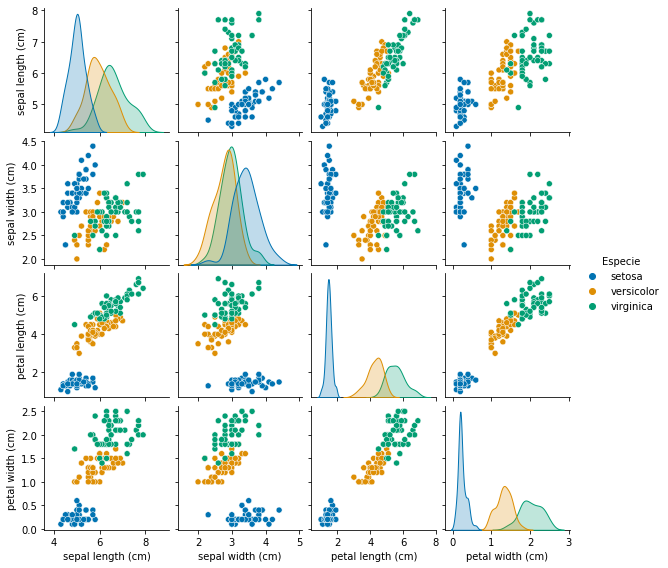

In [3]:
#Preprocesamiento
df = pd.DataFrame(data=iris.data, columns=["sepal length (cm)", "sepal width (cm)",
                                         "petal length (cm)", "petal width (cm)"])
df.insert(4, "Especie", iris.target, True)

df["Especie"] = [(s, "setosa")[s==0] for s in df["Especie"]]
df["Especie"] = [(s, "versicolor")[s==1] for s in df["Especie"]]
df["Especie"] = [(s, "virginica")[s==2] for s in df["Especie"]]


#Gráficas
sns.pairplot(df, hue="Especie", height=2, palette='colorblind')

plt.show()

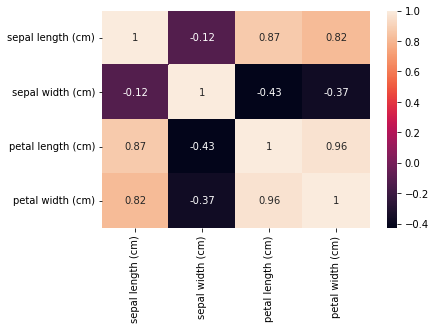

In [4]:
#Matriz de correlación
corrmat = df.corr()
sns.heatmap(corrmat, annot=True);
plt.show()

De las gráficas anteriores, se puede apreciar que hay una fuerte correlación entre el largo del sepal y las dimensiones del pétalo (largo y ancho), así como el ancho y el largo del pétalo. Por el otro lado, no hay una buena correlación del ancho del sepal con las demás variables.

Lo que resta ahora es dividir el dataset en datos de entrenamiento y evaluación. Para ello es importane mencionar que para conseguir una buena precisión, la división debe de ser equitativa entre las clases.

In [5]:
ts = 0.4 #Test size
seed = 50 #semilla

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=ts, 
                                                    random_state=seed, shuffle=True,
                                                    stratify=iris.target)


#### Funciones principales
Debido a que muchas ecuaciones se utilizarán de manera repetitiva, resulta conveniente definirlas antes de empezar con la resolución del problema por los diferentes estrategias. Estas son:
- 1. Función Sigmoide.
- 2. Función Softmax
- 3. Función de costo usada para la regresión logística.
- 4. Función de costo usada para el softmax.
- 5. Gradiente de la función de costo.
- 6. Asignación de las variables de entrenamiento (Vector de parámetros con Bias y etiquetas)
- 7. Función para la creación de datasets (OvA)
- 8. Función del gradient descent

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

def cost_function(h, X, y):
    m = len(y)
    return -(1/m)*(y*np.log(h) + (1-y)*np.log(1-h)).sum(axis=1)

def cost_fn_softmax(a, b):
    return np.mean(- np.sum(np.log(a)*(b), axis=1))

def gradient(hypo, X, y):
    m = len(y)
    return 1/m * np.dot(hypo-y,X)

def data():
    global X_train, X_test, Y_train, Y_test
    m, t = len(X_train), len(X_test)
    
    #Entrenamiento
    X = np.c_[[np.concatenate([X_train[i], [1]], axis=0) for  i in range(m)]]
    Y = np.c_[Y_train]
    
    #Evaluación
    X_t = np.c_[[np.concatenate([X_test[i], [1]], axis=0) for  i in range(t)]]
    Y_t = np.c_[Y_test]
    return X, Y, X_t, Y_t


def data2():
    global iris
    m = 150
    
    #Entrenamiento
    X = np.c_[[np.concatenate([iris.data[i], [1]], axis=0) for  i in range(m)]]
    Y = np.c_[iris.target]
    
    return X, Y, X, Y


def datasets(new_datasets, targets, weights, params, metodo='OvA'):

    i = 0
    
    
    for nds in new_datasets:
        
        weights[i] = np.random.randn((params), 1) #Rellenamos con números aleatorios (Bias considerado)
        
        for j in range(np.shape(targets)[0]):
            if metodo == 'OvA':
                if targets[j] == i:
                    nds[j] = 1
                else:
                    nds[j] = 0
        i+=1
        
    return weights, new_datasets


def gradient_descent(A, Y, J, th, clases=3, epochs=1000, lr=0.001, metodo='OvA'):
    #Descripción de los parámetros:
    # clases = Cantidad de veces que se repetirá el gradient descent
    # epochs = Épocas, el valor por defecto será de 1000
    # lr = razón de aprendizaje, el valor por defecto será de 0.001
    # X = Vector de parámetros
    # Y = Vector de clases
    # J = Vector de error
    # th = Vector de pesos
    
    
    for c in range(clases):
        #print(f"Clase: {c}")
        
        if metodo == 'OvA':
            X = A
        if metodo == 'OvO':
            X = A[c]
            
        for e in range(epochs):
            hypothesis = sigmoid(X @ th[c])
            J[c][e] = cost_function(hypothesis, X, Y[c]).sum(axis=0)
            dW = (X.T @ (hypothesis - Y[c]))
            th[c] = th[c] - lr*dW
    
    return J, th
    

## Implementación de la estrategia OvA
El primer paso es la creación de los subconjuntos de datos, como se mencionó en la sección de introducción, se harán 3 subconjuntos siguiendo la metodología OvA, de igual manera, en este punto se realizará un preprocesamiento a los parámetros de entrenamiento para adicionarles una columna correspondiente al bias (*Sesgo*), se seleccionarán unos datos aleatorios para el vector de pesos $\theta$ y por último, se hará una verificación de los subconjuntos obtenidos.

In [7]:
#Seleccionamos los datos a utilizar
X_OvA, Y_OvA, X_test_OvA, Y_test_OvA = data()

#4 datos correspodientes a las variables del problema y un bias
params = len(X_OvA[0])

#Creación de las estructuras usadas en este apartado
ds_class0 = np.c_[np.zeros(len(Y_OvA), dtype=int)]
ds_class1 = np.c_[np.zeros(len(Y_OvA), dtype=int)]
ds_class2 = np.c_[np.zeros(len(Y_OvA), dtype=int)]

new_datasets = [ds_class0, ds_class1, ds_class2]

th_OvA = np.array([np.zeros(params).reshape(-1, 1),
                   np.zeros(params).reshape(-1, 1),
                   np.zeros(params).reshape(-1, 1)])


# Creación de datasets
th_OvA, new_datasets = datasets(new_datasets, Y_OvA, th_OvA, params)

print('Pesos aleatorios:\n')
print(th_OvA)   

print('\n\nTargets originales:\n')
[print(f'Original: {Y_OvA[i]}  Clase 0: {new_datasets[0][i]}  Clase 1: {new_datasets[1][i]}  Clase 2: {new_datasets[2][i]}')
 for i in range(len(Y_OvA))];


Pesos aleatorios:

[[[-0.26013741]
  [-0.91166503]
  [-0.34404327]
  [ 0.83349935]
  [ 0.99842757]]

 [[ 2.44712849]
  [-1.10934794]
  [-1.1467363 ]
  [ 0.22599779]
  [-0.1242576 ]]

 [[ 0.1129433 ]
  [-0.2566433 ]
  [ 0.16624899]
  [-0.9261357 ]
  [-1.23114965]]]


Targets originales:

Original: [2]  Clase 0: [0]  Clase 1: [0]  Clase 2: [1]
Original: [0]  Clase 0: [1]  Clase 1: [0]  Clase 2: [0]
Original: [2]  Clase 0: [0]  Clase 1: [0]  Clase 2: [1]
Original: [2]  Clase 0: [0]  Clase 1: [0]  Clase 2: [1]
Original: [1]  Clase 0: [0]  Clase 1: [1]  Clase 2: [0]
Original: [0]  Clase 0: [1]  Clase 1: [0]  Clase 2: [0]
Original: [1]  Clase 0: [0]  Clase 1: [1]  Clase 2: [0]
Original: [1]  Clase 0: [0]  Clase 1: [1]  Clase 2: [0]
Original: [0]  Clase 0: [1]  Clase 1: [0]  Clase 2: [0]
Original: [0]  Clase 0: [1]  Clase 1: [0]  Clase 2: [0]
Original: [1]  Clase 0: [0]  Clase 1: [1]  Clase 2: [0]
Original: [2]  Clase 0: [0]  Clase 1: [0]  Clase 2: [1]
Original: [0]  Clase 0: [1]  Clase 1: [0

Una vez preparados los diferentes targets para este método, creado los pesos aleatorios iniciales y agregado el bias a los parámetros de entrenamiento, procedemos a entrenar nuestro algoritmo utilizando el descenso del gradiente

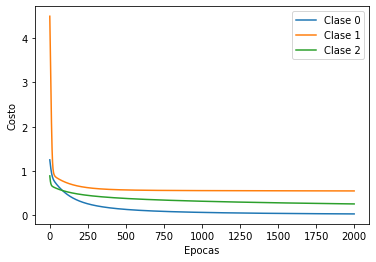

In [8]:
epochs_OvA = 2000

J_OvA = np.array([np.zeros(epochs_OvA),
                  np.zeros(epochs_OvA),
                  np.zeros(epochs_OvA)])


J_OvA, th_OvA = gradient_descent(X_OvA, new_datasets, J_OvA, th_OvA, clases=3, epochs=epochs_OvA, lr=0.0001)


plt.plot(J_OvA[0])
plt.plot(J_OvA[1])
plt.plot(J_OvA[2])

plt.ylabel("Costo")
plt.xlabel("Epocas")

plt.legend(['Clase 0', 'Clase 1', 'Clase 2'])

plt.show()

In [9]:
print(np.min(J_OvA[0]))
print(np.min(J_OvA[1]))
print(np.min(J_OvA[2]))

0.03555025972426924
0.5533486773168425
0.2604528175646085


In [10]:
print(f"Los pesos encontrados son: \n{th_OvA}")

Los pesos encontrados son: 
[[[ 0.54012833]
  [ 0.65281522]
  [-2.23921645]
  [-0.08211709]
  [ 1.32537065]]

 [[ 1.32149968]
  [-2.26437181]
  [-0.43422053]
  [ 0.13856738]
  [-0.27146412]]

 [[-0.71357379]
  [-0.97517442]
  [ 1.68109632]
  [ 0.42629996]
  [-1.61097201]]]


In [11]:
#Creamos una matriz en la que guardaremos las predicciones para cada clase
Y_test_clases = np.array([np.zeros(len(Y_test_OvA)).reshape(-1, 1), 
                          np.zeros(len(Y_test_OvA)).reshape(-1, 1), 
                          np.zeros(len(Y_test_OvA)).reshape(-1, 1)])  


#Realizamos las predicciones 
for i in range(3):
    Y_test_clases[i] = sigmoid(X_test_OvA @ th_OvA[i])

#Calculamos la probabilidad
probability_OvA = np.c_[Y_test_clases[0:1].T, 
                        Y_test_clases[1:2].T, 
                        Y_test_clases[2:3].T]    

#Realizamos la predicción final haciendo un argmax
Y_predict_OvA = np.argmax(probability_OvA, axis=-1)    

print(probability_OvA)
[print(f'Original {Y_test_OvA[i]} Predicción: {Y_predict_OvA[0][i]}') for i in range(len(Y_test_OvA))];

[[[4.83834337e-02 2.20226323e-01 2.52405530e-01]
  [9.60037066e-01 7.29721167e-02 1.98144269e-03]
  [9.38675458e-03 2.96275750e-01 5.14104098e-01]
  [4.70080175e-03 3.38090197e-01 7.31233573e-01]
  [6.08525755e-02 5.16163827e-01 2.65231882e-01]
  [9.61757712e-01 8.34859125e-02 1.92543889e-03]
  [9.87456040e-01 1.03622755e-01 5.26979331e-04]
  [9.46343072e-01 7.88723210e-02 3.24438552e-03]
  [4.49028724e-02 2.92430954e-01 2.59892733e-01]
  [5.56589614e-03 2.60664082e-01 6.43800515e-01]
  [4.49782566e-02 3.36412278e-01 2.76448709e-01]
  [1.58913144e-02 3.48909398e-01 4.27072523e-01]
  [1.73429007e-02 6.18745847e-01 3.71058182e-01]
  [9.55636640e-01 1.93077826e-01 2.26548343e-03]
  [3.23338985e-02 3.47860158e-01 3.48608421e-01]
  [2.12196743e-04 7.92374799e-01 9.49746306e-01]
  [3.47880314e-03 2.74440131e-01 6.92638730e-01]
  [9.38016198e-01 2.16239035e-01 4.15108984e-03]
  [2.31488056e-03 3.32942130e-01 7.76777794e-01]
  [9.53716357e-01 1.36675792e-01 2.97467384e-03]
  [9.32766978e-01 1.

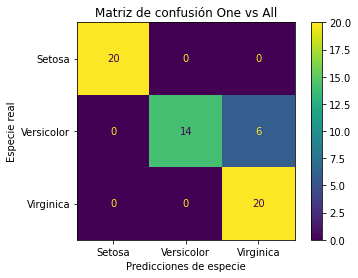

In [12]:
matrix_OvA = confusion_matrix(Y_test_OvA, Y_predict_OvA[0])

matrix_obj_OvA = ConfusionMatrixDisplay(matrix_OvA, display_labels=['Setosa', 'Versicolor', 'Virginica'])
matrix_obj_OvA.plot()
matrix_obj_OvA.ax_.set(title='Matriz de confusión One vs All', xlabel='Predicciones de especie', ylabel='Especie real')

plt.show()

## Regresión logística One vs One
Este tipo de metodología realiza una clasificación binaria entre cada uno de las combinaciones que existe, iremos haciendo una comparación entre cada clase, las comparaciones son:
- clase 0 vs clase 1
- clase 0 vs clase 2
- clase 1 vs clase 2

In [13]:
#Preparamos los datos

#Seleccionamos los datos a utilizar
x_ovo, y_ovo, X_test_OvO, Y_test_OvO = data()

#Realizamos el preprocesameinto
train_OvO = np.concatenate([x_ovo, y_ovo], axis=1)
test_OvO = np.concatenate([X_test_OvO, Y_test_OvO], axis=1)

#Hacemos un filtrado de los datos por clase
#PARA DATOS DE ENTRENAMIENTO
flag0 = 0
flag1 = 0
flag2 = 0
X_clase0 = [0, 0, 0, 0, 0]
X_clase1 = [0, 0, 0, 0, 0]
X_clase2 = [0, 0, 0, 0, 0]

Y_clase0 = [0, 0, 0, 0, 0]
Y_clase1 = [0, 0, 0, 0, 0]
Y_clase2 = [0, 0, 0, 0, 0]

for d in train_OvO:
    #Etiqueta 0
    if d[5] == 0:
        if flag0 == 0:
            X_clase0 = d[[0, 1, 2, 3, 4]]
            Y_clase0 = d[[5]]
            flag0 = 1
        else:
            X_clase0 = np.vstack([X_clase0, d[[0, 1, 2, 3, 4]]])
            Y_clase0 = np.vstack([Y_clase0, d[[5]]])
    
    #Etiqueta 1
    if d[5] == 1:
        if flag1 == 0:
            X_clase1 = d[[0, 1, 2, 3, 4]]
            Y_clase1 = d[[5]]
            flag1 = 1
        else:
            X_clase1 = np.vstack([X_clase1, d[[0, 1, 2, 3, 4]]])
            Y_clase1 = np.vstack([Y_clase1, d[[5]]])
            
    #Etiqueta 2
    if d[5] == 2:
        if flag2 == 0:
            X_clase2 = d[[0, 1, 2, 3, 4]]
            Y_clase2 = d[[5]]
            flag2 = 1
        else:
            X_clase2 = np.vstack([X_clase2, d[[0, 1, 2, 3, 4]]])
            Y_clase2 = np.vstack([Y_clase2, d[[5]]])


#Creamos las combinaciones que se evaluarán
X01 = np.append(X_clase0, X_clase1, axis=0)
Y01 = np.append(Y_clase0, Y_clase1, axis=0)
X02 = np.append(X_clase0, X_clase2, axis=0)
Y02 = np.append(Y_clase0, Y_clase2, axis=0)
X12 = np.append(X_clase1, X_clase2, axis=0)
Y12 = np.append(Y_clase1, Y_clase2, axis=0)

#Y01 -> 0 = etiqueta 0 & 1 = etiqueta 1
#Y02 -> 0 = etiqueta 0 & 1 = etiqueta 2
#Y12 -> 0 = etiqueta 1 & 1 = etiqueta 2


for i in range(len(Y02)):
    if Y02[i] == 2:
        Y02[i] = 1

for i in range(len(Y12)):
    if Y12[i] == 1:
        Y12[i] = 0
    else:
        Y12[i] = 1

params2 = len(X01[0])

#Pesos para cada uno de las combinaciones
th_OvO = np.array([np.zeros(params2).reshape(-1, 1),
                   np.zeros(params2).reshape(-1, 1),
                   np.zeros(params2).reshape(-1, 1)])

for i in range(3):
    th_OvO[i] = np.random.randn((params2), 1) #Rellenamos con números aleatorios (Bias considerado)

X_OvO = np.array([X01, X02, X12])
Y_OvO = np.array([Y01, Y02, Y12], dtype=object)


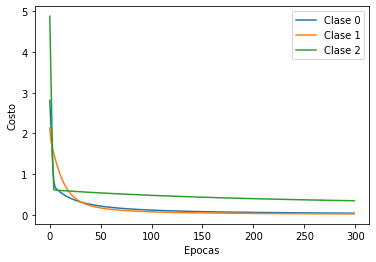

In [14]:
#Entrenamiento
epochs_OvO = 300

#Creamos un arreglo en el que iremos guardando nuestro error
J_OvO = np.array([np.zeros(epochs_OvO),
                  np.zeros(epochs_OvO),
                  np.zeros(epochs_OvO)])


J_OvA, th_OvA = gradient_descent(X_OvO, Y_OvO, J_OvO, th_OvO, clases=3, epochs=epochs_OvO, lr=0.001, metodo='OvO')


plt.plot(J_OvO[0])
plt.plot(J_OvO[1])
plt.plot(J_OvO[2])

plt.ylabel("Costo")
plt.xlabel("Epocas")

plt.legend(['Clase 0', 'Clase 1', 'Clase 2'])

plt.show()


In [15]:
print(np.min(J_OvO[0]))
print(np.min(J_OvO[1]))
print(np.min(J_OvO[2]))

0.04017641700756967
0.02213261993953818
0.34525557906859083


Después de haber realizado el entrenamiento con éxito, procedemos a hacer una prueba:

In [16]:
aux = len(Y_test_OvO)

Y_test_clases_OvO = np.array([np.zeros(aux).reshape(-1, 1), 
                              np.zeros(aux).reshape(-1, 1), 
                              np.zeros(aux).reshape(-1, 1)]) 

for i in range(3):
    Y_test_clases_OvO[i] = sigmoid(X_test_OvO @ th_OvO[i])

probability_OvO = np.c_[Y_test_clases_OvO[0:1].T,
                        Y_test_clases_OvO[1:2].T,
                        Y_test_clases_OvO[2:3].T]

Y01_predict = Y_test_clases_OvO[0:1].T.round(0)
Y02_predict = Y_test_clases_OvO[1:2].T.round(0)
Y12_predict = Y_test_clases_OvO[2:3].T.round(0)

Y_predict_OvO = np.zeros(aux)

for i in range(aux):
    if (Y01_predict[0][i] == 0 and Y02_predict[0][i] == 0): #En ambos son 0
        Y_predict_OvO[i] = 0
    if (Y01_predict[0][i] == 1 and Y12_predict[0][i] == 0): #En ambos son 1
        Y_predict_OvO[i] = 1
    if (Y02_predict[0][i] == 1 and Y12_predict[0][i] == 1): #En ambos son 2
        Y_predict_OvO[i] = 2


[print(f'Original {Y_test_OvO[i]} Predicción: {Y_predict_OvO[i]}') for i in range(len(Y_test_OvO))];

Original [1] Predicción: 1.0
Original [0] Predicción: 0.0
Original [2] Predicción: 2.0
Original [2] Predicción: 2.0
Original [1] Predicción: 1.0
Original [0] Predicción: 0.0
Original [0] Predicción: 0.0
Original [0] Predicción: 0.0
Original [1] Predicción: 1.0
Original [2] Predicción: 2.0
Original [1] Predicción: 1.0
Original [1] Predicción: 1.0
Original [1] Predicción: 1.0
Original [0] Predicción: 0.0
Original [1] Predicción: 1.0
Original [2] Predicción: 2.0
Original [2] Predicción: 2.0
Original [0] Predicción: 0.0
Original [2] Predicción: 2.0
Original [0] Predicción: 0.0
Original [0] Predicción: 0.0
Original [2] Predicción: 2.0
Original [2] Predicción: 2.0
Original [1] Predicción: 1.0
Original [1] Predicción: 1.0
Original [2] Predicción: 2.0
Original [0] Predicción: 0.0
Original [1] Predicción: 1.0
Original [1] Predicción: 1.0
Original [0] Predicción: 0.0
Original [1] Predicción: 1.0
Original [1] Predicción: 1.0
Original [2] Predicción: 2.0
Original [1] Predicción: 1.0
Original [2] P

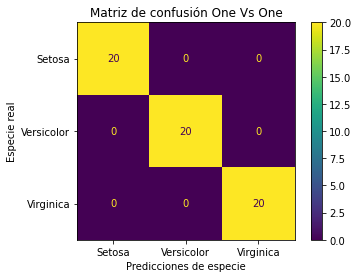

In [17]:
matrix_OvO = confusion_matrix(Y_test_OvO, Y_predict_OvO)

matrix_obj_OvO = ConfusionMatrixDisplay(matrix_OvO, display_labels=['Setosa', 'Versicolor', 'Virginica'])
matrix_obj_OvO.plot()
matrix_obj_OvO.ax_.set(title='Matriz de confusión One Vs One', xlabel='Predicciones de especie', ylabel='Especie real')

plt.show()

## Softmax
Finalmente, la última metodología a utilizar es la de Softmax.

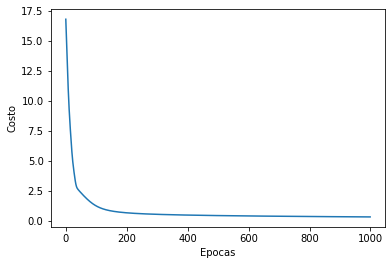

In [23]:
#Preprocesameinto
X_Soft, Y_Soft, X_test_Soft, Y_test_Soft = data2()

size = int(len(Y_Soft) / 3)
#size = 50

#Codificación One-Hot
Y0 = np.c_[(np.ones(size), np.zeros(size), np.zeros(size))]
Y1 = np.c_[(np.zeros(size), np.ones(size), np.zeros(size))]
Y2 = np.c_[(np.zeros(size), np.zeros(size), np.ones(size))]

Y012 = (np.append(Y0, Y1, axis=0))
Y012 = (np.append(Y012, Y2, axis=0))


th_Soft = np.random.randn(5,3)

#Entrenamiento
epochs_Soft = 1000
lr_Soft = 0.0001

J_Soft = np.zeros(epochs_Soft)
    
for i in range(epochs_Soft):
    hypothesis = softmax(X_Soft @ th_Soft)
    J_Soft[i] = cost_fn_softmax(hypothesis, Y012)
    dW = X_Soft.T @ (hypothesis - Y012)
    th_Soft = th_Soft - lr_Soft*dW

#print(Y012)
    
plt.plot(J_Soft)
plt.ylabel("Costo")
plt.xlabel("Epocas")

plt.show()

In [24]:
Y_predict_Soft =  np.argmax(softmax(X_test_Soft @ th_Soft), axis = -1).reshape(-1,1)
[print(f'Original {Y_test_Soft[i]} Predicción: {Y_predict_Soft[i]}') for i in range(len(Y_test_Soft))];

Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] Predicción: [0]
Original [0] P

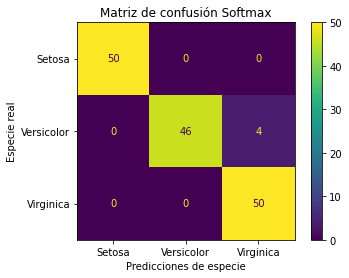

In [25]:
matrix_Soft = confusion_matrix(Y_test_Soft, Y_predict_Soft)

matrix_obj_Soft = ConfusionMatrixDisplay(matrix_Soft, display_labels=['Setosa', 'Versicolor', 'Virginica'])
matrix_obj_Soft.plot()

matrix_obj_Soft.ax_.set(title='Matriz de confusión Softmax', xlabel='Predicciones de especie', ylabel='Especie real')

plt.show()

## Referencias
[1] https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
